# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano; **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. Není potřeba používat sofistikované metody. _Hlavně pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model (jednoznačně popište o který konkrétně jde) a správně odhadněte, jakou **přesnost** můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **survived** a identifikátory do sloupce **ID** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

      * Snažte se vše udělat tak, aby přesnost odevzdaných predikcí na vyhodocovacím datasetu byla alespoň **75%**. Pokud bude menší, přijdete o **3 body**.
      * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami survived):
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

## **Solution**

**importing libraries we will use**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**reading csv file of data about titanic passangers**

In [2]:
data_df = pd.read_csv('data.csv')
data_df.head()

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,0,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S,Guernsey
1,1,0,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S,"Sweden Joliet, IL"
2,2,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C,NaN
3,3,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,NaN
4,4,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S,"Nice, France"


**looking at data types of columns, number of entries and non-null count**

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        796 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       1000 non-null   float64
 10  cabin      225 non-null    object 
 11  embarked   1000 non-null   object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


**seeing how many null-values are in the dataset**

In [4]:
data_df.isnull().sum(axis=0)

ID             0
survived       0
pclass         0
name           0
sex            0
age          204
sibsp          0
parch          0
ticket         0
fare           0
cabin        775
embarked       0
home.dest    427
dtype: int64

*We can see that most null-values are in columns `age`, `cabin` and `home.dest`*

> In the Titanic dataset, dropping `ID`, `name`, `ticket`, `cabin` and `home.dest` columns makes sense, as these fields don’t contribute to predicting survival. The `ID` is simply a unique identifier without relevance to survival chances. `Names` are specific to each passenger and don’t directly impact survival. `Ticket` and `cabin` numbers are nearly unique and don’t offer meaningful insights into survival. `Destination/hometown` also do not give informative insights, as the destination can be same for passangers of different classes, same as hometown. Removing these columns reduces noise, allowing the model to focus on features that have a real influence on survival outcomes (such as age, sex, pclass and number of relatives on board).

In [5]:
data_df.drop(columns=["ID", "name", "ticket", "cabin", "home.dest"], inplace=True)

**making `object` columns have factorized values (model needs numeric encoding to learn better)**

In [6]:
for col in data_df.select_dtypes(['object']).columns:
    data_df[col] = pd.factorize(data_df[col])[0]

**looking at the result**

In [7]:
data_df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,2,0,23.0,0,0,10.5000,0
1,0,3,0,24.0,0,0,7.7750,0
2,0,3,0,28.5,0,0,7.2292,1
3,0,3,0,16.0,0,0,9.2167,0
4,1,2,0,3.0,1,1,26.0000,0
5,1,1,1,52.0,1,1,93.5000,0
6,1,1,1,36.0,0,0,135.6333,1
7,1,1,1,24.0,0,0,69.3000,1
8,0,3,0,28.0,0,0,7.8958,0
9,1,2,0,42.0,0,0,13.0000,0


**dividing the dataset into target variable I want to predict and attribute matrix**

In [8]:
Xdata = data_df.drop('survived', axis=1)
ydata = data_df.survived

**splitting the dataset using `train_test_split` function from the `sklearn` library with a random_state and test_size being `40%`**

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=333)

**splitting the second part of dataset into validation and test, so that both test and validation are now `20%` of the given dataset**

In [10]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=333) 

**changing missing values of `age` and `fare` to median value. For fare, the median should be calculated by passenger class, as this would more accurately reflect fare distribution patterns**

In [11]:
age_median = Xtrain["age"].median()
Xtrain["age"] = Xtrain["age"].fillna(age_median)
Xval["age"] = Xval["age"].fillna(age_median)
Xtest["age"] = Xtest["age"].fillna(age_median)


# changing fare to median fare by pclass 
Xtrain['fare'] = Xtrain.groupby('pclass')['fare'].transform(lambda x: x.fillna(x.median()))
Xval['fare'] = Xval.groupby('pclass')['fare'].transform(lambda x: x.fillna(x.median()))
Xtest['fare'] = Xtest.groupby('pclass')['fare'].transform(lambda x: x.fillna(x.median()))

**replacing null-values with -1**

In [12]:
Xtrain = Xtrain.replace(np.nan, -1)
Xval = Xval.replace(np.nan, -1)
Xtest = Xtest.replace(np.nan, -1)

> Replacing `NaN` values with `-1` ensures missing data is handled consistently across datasets without removing rows it serves as a placeholder that models can recognize and interpret differently from other values allowing for better handling of incomplete data

### **Decision Tree**

> A decision tree is a suitable choice because it’s highly interpretable, capable of handling both numerical and categorical data, and effectively captures non-linear relationships in features. Its non-parametric nature allows it to adapt to various data patterns without assumptions about the data distribution. Decision trees are also efficient in training and prediction, which is useful when testing multiple parameter combinations. 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics

**finding parameters most suitable for decision tree model**

In [14]:
# Define a grid of hyperparameters for the Decision Tree model
parameter_grid = {
    'max_depth': range(3, 30),            # Maximum depth of the tree; controls complexity and overfitting
    'criterion': ['entropy', 'gini'],     # Function to measure split quality: 'entropy' (information gain) or 'gini' impurity
}

# Generate all combinations of hyperparameters from the parameter grid
parameter_comb = ParameterGrid(parameter_grid)

# Initialize lists to store accuracy scores for training and validation datasets
valid = []
training = []

# Iterate over each parameter combination, train the model, and evaluate performance
for parameters in parameter_comb:
    # Create a DecisionTreeClassifier with the current set of hyperparameters
    clf = DecisionTreeClassifier(**parameters)
    
    # Fit the classifier to the training data
    clf.fit(Xtrain, ytrain)
    
    # Evaluate the classifier on the training set and append the accuracy score
    training.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    
    # Evaluate the classifier on the validation set and append the accuracy score
    valid.append(metrics.accuracy_score(yval, clf.predict(Xval)))

**training our decision tree model**

In [15]:
# Select the best hyperparameter combination based on the highest validation accuracy
best_parameters = parameter_comb[np.argmax(valid)]

# Initialize a DecisionTreeClassifier using the best-performing hyperparameters
tree_model = DecisionTreeClassifier(**best_parameters)
tree_model.fit(Xtrain, ytrain)
print('Accuracy for training set: {0:.3f}'.format(metrics.accuracy_score(ytrain, tree_model.predict(Xtrain))))
print('Accuracy for validation set: {0:.3f}'.format(metrics.accuracy_score(yval, tree_model.predict(Xval))))

Accuracy for training set: 0.782
Accuracy for validation set: 0.845


> The `F1 Score` balances precision and recall, making it ideal for imbalanced datasets, with values closer to 1 indicating better performance.
>
> The `ROC Curve` shows a model’s ability to distinguish classes by plotting true positive rate versus false positive rate; its AUC value (closer to 1) signals strong model discrimination, while 0.5 suggests random guessing.

In [16]:
#find f1 score for our best decision tree model 
from sklearn.metrics import f1_score

y_pred = tree_model.predict(Xtest)
f1 = f1_score(ytest, y_pred)
print("F1 Score is:", f1.round(3))

F1 Score is: 0.775


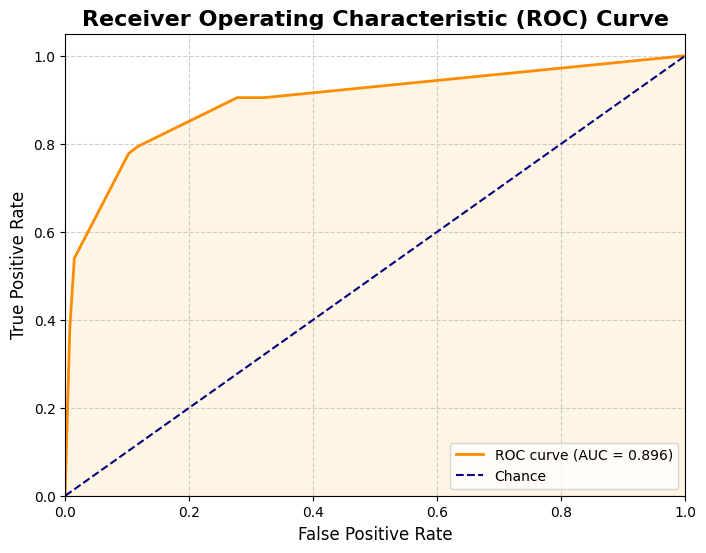

In [17]:
#find ROC curve for our best decision tree model
from sklearn.metrics import roc_curve, auc

y_prob = tree_model.predict_proba(Xtest)[:,1]

#finding values for auc score of roc curve
fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5, label='Chance')
plt.fill_between(fpr, tpr, alpha=0.1, color='orange')  # Fill area under the curve

# Adding titles and labels
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="lower right", fontsize=10)
plt.show()

> An F1 Score of approximately 77% suggests the model strikes a moderate balance between precision and recall. An AUC around 89% indicates a reasonably strong model. The smooth curve of the ROC suggests that true positives increase with only a small rise in false positives, pointing to a quality model.

### **kNN prediction**

> K-Nearest Neighbors (KNN) is suitable for the Titanic dataset due to its simplicity and effectiveness in handling classification problems. It can easily classify passengers as survivors or non-survivors based on features like age, gender, and class. KNN doesn’t require assumptions about data distribution and can adapt well to the non-linear relationships often present in such datasets. Additionally, since the Titanic dataset is relatively small, KNN can efficiently compute distances between data points to make accurate predictions without significant computational overhead.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

> These parameters allow us to explore a range of options that influence the K-Nearest Neighbors (KNN) model’s accuracy and adaptability to data structure. The `n_neighbors` parameter adjusts the model’s sensitivity by balancing local detail with generalization. Testing different `weights` allows us to evaluate whether closer points should influence predictions more heavily, which can improve accuracy for data where proximity matters. The choice of `metric` helps determine the best similarity measure for the data, with options from Euclidean to Cosine distance for different spatial and categorical data patterns. The `p` parameter within the Minkowski distance offers flexibility by allowing for a continuum of distance calculations, encompassing both standard metrics (Euclidean and Manhattan) and a wide range of alternative geometries for datasets with non-standard structures.

In [19]:
# Define a grid of hyperparameters for K-Nearest Neighbors (KNN) model with various distance metrics
param_grid_knn = {
    'n_neighbors': range(5, 25),          # Range for the number of neighbors to consider (k), from 5 to 24
    'weights': ['uniform', 'distance'],   # Weight function: 'uniform' (equal weights) or 'distance' (closer points have higher influence)
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'hamming', 'cosine'] # Distance metrics for calculating similarity
}

# Define another grid of hyperparameters for KNN model, focusing on Minkowski distance metric with varying powers (p)
param_grid_knn_minkowski = {
    'n_neighbors': range(5, 25),          # Similar range for the number of neighbors as above
    'weights': ['uniform', 'distance'],   # Weight function options as in the previous grid
    'p': [2**i for i in range(20)]        # Powers of 2 up to 2^19 for the Minkowski distance metric, allowing flexibility in distance calculation
}

# Generate all combinations of hyperparameters from the first parameter grid for general KNN
param_comb_knn1 = ParameterGrid(param_grid_knn)

# Generate all combinations of hyperparameters from the Minkowski-specific parameter grid
param_comb_knn2 = ParameterGrid(param_grid_knn_minkowski)

In [20]:
# Min-max scaler fit on training data
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)

Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)

In [21]:
val_acc_knn1 = []
train_acc_knn1 = []
val_acc_knn2 = []
train_acc_knn2 = []

for params in param_comb_knn1:
    clf = KNeighborsClassifier(**params)
    clf.fit(Xtrain_scaled, ytrain)
    train_acc_knn1.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain_scaled)))
    val_acc_knn1.append(metrics.accuracy_score(yval, clf.predict(Xval_scaled)))

for params in param_comb_knn2:
    clf = KNeighborsClassifier(**params)
    clf.fit(Xtrain_scaled, ytrain)
    train_acc_knn2.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain_scaled)))
    val_acc_knn2.append(metrics.accuracy_score(yval, clf.predict(Xval_scaled)))

In [22]:
best_parameters1 = param_comb_knn1[np.argmax(val_acc_knn1)]

KNN1 = KNeighborsClassifier(**best_parameters1)
KNN1.fit(Xtrain_scaled, ytrain)
print('Accuracy score for training dataset: {0:.6f}'.format(metrics.accuracy_score(ytrain, KNN1.predict(Xtrain_scaled))))
print('Accuracy score for validation dataset: {0:.6f}'.format(metrics.accuracy_score(yval, KNN1.predict(Xval_scaled))))

Accuracy score for training dataset: 0.780000
Accuracy score for validation dataset: 0.845000


In [23]:
best_parameters2 = param_comb_knn2[np.argmax(val_acc_knn2)]

KNN2 = KNeighborsClassifier(**best_parameters2)
KNN2.fit(Xtrain_scaled, ytrain)
print('Accuracy score for training dataset: {0:.6f}'.format(metrics.accuracy_score(ytrain, KNN2.predict(Xtrain_scaled))))
print('Accuracy score for validation dataset: {0:.6f}'.format(metrics.accuracy_score(yval, KNN2.predict(Xval_scaled))))

Accuracy score for training dataset: 0.775000
Accuracy score for validation dataset: 0.850000


In [24]:
best_KNN = KNN2
print('Accuracy score for training dataset: {0:.3f}'.format(metrics.accuracy_score(ytrain, best_KNN.predict(Xtrain_scaled))))
print('Accuracy score for validation dataset: {0:.3f}'.format(metrics.accuracy_score(yval, best_KNN.predict(Xval_scaled))))

Accuracy score for training dataset: 0.775
Accuracy score for validation dataset: 0.850


**calculating f1 score for best kNN model**

In [25]:
y_pred = best_KNN.predict(Xtest_scaled)
f1 = f1_score(ytest, y_pred)
print("F1 Score:", f1.round(3))

F1 Score: 0.742


**calculating ROC curve and visualizing it**

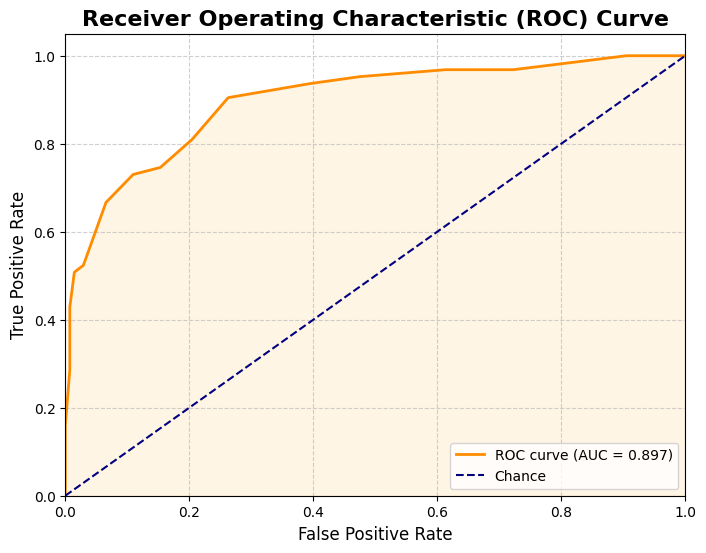

In [26]:
y_prob = best_KNN.predict_proba(Xtest_scaled)[:,1]

# Calculate values for ROC curve and AUC-score
fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5, label='Chance')
plt.fill_between(fpr, tpr, alpha=0.1, color='orange')  # Fill area under the curve

# Adding titles and labels
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, weight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc="lower right", fontsize=10)
plt.show()

### **Best model**

> I selected the best model based on the F1 Score and ROC Curve. The F1 Score balances precision and recall, indicating how well the model classifies both positive and negative cases. The ROC Curve shows the trade-off between true positive and false positive rates, with a higher AUC reflecting better class discrimination.
>
> I chose the k Nearest Neighbors model due to its strong performance on validation data, demonstrated by a high F1 Score and AUC. 

In [27]:
# test the final model we consider best
best_model = KNN2
print('Accuracy score for testing dataset: {0:.3f}'.format(metrics.accuracy_score(ytest, best_model.predict(Xtest_scaled))))

Accuracy score for testing dataset: 0.840


> We can say that the accuracy when working with new data that were not used during training and selection of parameters and model will be around 84%

**reading an evaluation dataset to check our model`s predictions**

In [28]:
eval_df = pd.read_csv('evaluation.csv')
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        250 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       308 non-null    float64
 9   cabin      70 non-null     object 
 10  embarked   307 non-null    object 
 11  home.dest  172 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


*We can see that the evaluation dataset has null-values in same columns as our training dataset*

**modifying data same way as `data.csv` to fit training data and check our model**

In [29]:
median_age = Xtrain['age'].median()
median_fare = Xtrain['fare'].median()

eval_df['age'] = eval_df['age'].fillna(median_age)
eval_df['fare'] = eval_df['fare'].fillna(median_fare)

id = eval_df["ID"]
eval_df.drop(columns=["ID", "name", "ticket", "cabin", "home.dest"], inplace=True)

# replacing null-values with -1 as we did in training dataset
eval_df = eval_df.replace(np.nan, -1)

In [30]:
string_columns = eval_df.select_dtypes(['object']).columns

for col in eval_df.select_dtypes(['object']).columns:
    eval_df[col] = pd.factorize(eval_df[col])[0]

df_eval_scaled = scaler.transform(eval_df)    

In [31]:
predicted_survived = best_model.predict(df_eval_scaled)

df_result = pd.DataFrame({
    'ID': id,
    'survived': predicted_survived
})

df_result.to_csv('results.csv', index=False)
df_result["survived"].value_counts()

survived
0    202
1    107
Name: count, dtype: int64